<a href="https://colab.research.google.com/github/rafaelafachine/DataScience/blob/main/TreinamentoDio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [5]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [6]:
#Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [14]:
#Exibe as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

In [ ]:
df.dtypes

In [ ]:
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
#consultar valores faltantes
df.isnull().sum()

In [ ]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [9]:
#Substituindo as linhas com valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [10]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [11]:
#Apagando as linhas com valores nulos -  coluna
df.dropna(subset=["Vendas"],inplace=True)

In [12]:
#Removendo as linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all",inplace=True)

**Criação de novas colunas**

In [16]:
df["Qtde"].head()

0    1
1    6
2    1
3    7
4    8
Name: Qtde, dtype: int64

In [17]:
#Criação a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [18]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [19]:
df["Receita/Vendas"] = df["Receita"]/df["Vendas"]

In [20]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [21]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [22]:
#retornando a menor receita
df["Receita"].min()

3.34

In [23]:
#nlargest - top 3 
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [24]:
#nlargest - piores receitas
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [27]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [28]:
#Ordenando o conjunto de dados - retornando as 10 primeiras linhas
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


**MANIPULAÇÃO DE DATAS**

In [29]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [31]:
#Verificando o type
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [32]:
#Transformando em data
df["Data"] = pd.to_datetime(df["Data"])

In [33]:
#Verificando o type
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                     int64
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [34]:
#Agrupando receita por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [35]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [36]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
146,Salvador,2019-01-02,149.88,1037,1,149.88,1.0,2019
13,Recife,2019-02-12,15.33,983,5,76.65,5.0,2019
24,Recife,2019-01-01,13.00,983,2,26.00,2.0,2019
127,Salvador,2019-03-02,240.61,1035,3,721.83,3.0,2019
97,Salvador,2019-01-01,39.91,1037,3,119.73,3.0,2019


In [37]:
#Retorna a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [38]:
#Extraindo o mês e o dia
df["mes_venda"],df["dia_venda"] = (df["Data"].dt.month,df["Data"].dt.day)

In [39]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
19,Fortaleza,2019-01-01,18.86,1002,3,56.58,3.0,2019,1,1
42,Salvador,2019-01-01,44.28,1034,1,44.28,1.0,2019,1,1
41,Natal,2018-05-20,835.00,852,4,3340.00,4.0,2018,5,20
208,Natal,2019-01-02,39.40,1036,3,118.20,3.0,2019,1,2
10,Natal,2018-10-27,828.00,852,4,3312.00,4.0,2018,10,27


In [40]:
#Calculando diferença de dias
df["diferenca_dias"] = df["Data"]-df["Data"].min()

In [41]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
66,Salvador,2019-01-01,70.20,1035,3,210.60,3.0,2019,1,1,365 days
67,Natal,2019-02-14,379.00,852,2,758.00,2.0,2019,2,14,409 days
110,Aracaju,2018-01-01,38.15,1520,4,152.60,4.0,2018,1,1,0 days
63,Fortaleza,2019-01-01,118.17,1004,1,118.17,1.0,2019,1,1,365 days
99,Recife,2019-01-01,136.72,980,4,546.88,4.0,2019,1,1,365 days


In [42]:
#criando a coluna trimestre
df["semestre_venda"] = df["Data"].dt.quarter

In [43]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
51,Aracaju,2018-01-01,40.58,1522,6,243.48,6.0,2018,1,1,0 days,1
31,Natal,2018-04-03,401.00,854,4,1604.00,4.0,2018,4,3,92 days,2
14,Recife,2019-01-12,102.91,982,3,308.73,3.0,2019,1,12,376 days,1
91,Recife,2019-01-01,150.58,982,6,903.48,6.0,2019,1,1,365 days,1
17,Recife,2019-02-14,142.45,981,3,427.35,3.0,2019,2,14,409 days,1


In [45]:
#utilizando o filtro
vendas_marco_19 =  df.loc[(df["Data"].dt.year==2019)& (df["Data"].dt.month == 3)]

In [46]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


**VISUALIZAÇÃO DE DADOS**

In [47]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

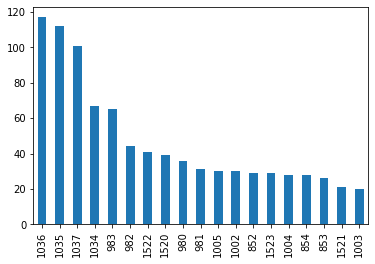

In [48]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

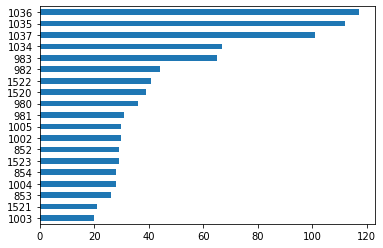

In [50]:
#Gráfico de barras horizontais
#  ; retira as informações acima do gráfico
df["LojaID"].value_counts(ascending=True).plot.barh()

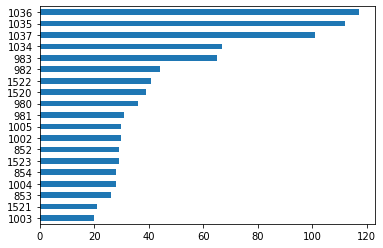

In [51]:
#Gráfico de barras horizontais
#  ; retira as informações acima do gráfico
df["LojaID"].value_counts(ascending=True).plot.barh();

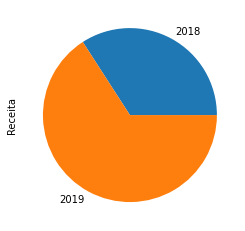

In [54]:
#Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [55]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

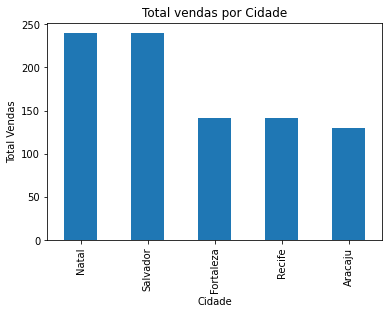

In [56]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

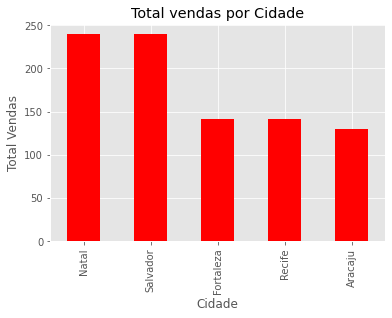

In [58]:
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade",color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [59]:
#Alterando o estilo
plt.style.use("ggplot")

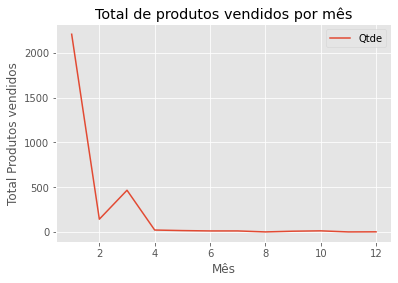

In [61]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos");
plt.legend()

In [62]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64